In [16]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import re
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [5]:
dataFrame = pd.read_csv(r"C:\Users\bedir\OneDrive\Desktop\EDA\data\mobile.csv",encoding="ISO-8859-1")

In [8]:
dataFrame.head()

,Company Name,Model,Memory,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16,128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16,256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16,512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus,128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus,256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [6]:
def modelname_parcala(text):
    text = str(text)
    parts = text.split()
    memory = parts[-1] if parts[-1].endswith('GB') else None
    model = ' '.join(parts[:-1]) if memory else ' '.join(parts)
    return pd.Series([model, memory])
dataFrame[['Model','Memory']] = dataFrame['Model Name'].apply(modelname_parcala)
dataFrame.drop(columns=['Model Name'], inplace=True)

In [7]:
sutunlar = dataFrame.columns.tolist()
model_sutunu = sutunlar[-2]
sutunlar.remove(model_sutunu)
sutunlar.insert(1, model_sutunu)
sonsutun = sutunlar[-1]
sutunlar.remove(sonsutun)
sutunlar.insert(2, sonsutun)
dataFrame = dataFrame[sutunlar]

In [9]:
def memory_int_donustur(memo):
    if isinstance(memo, str):
        match = re.search(r'\d+', memo)
        return int(match.group()) if match else None
    return None

dataFrame['Memory'] = dataFrame['Memory'].apply(memory_int_donustur)
dataFrame['Memory'] = dataFrame['Memory'].replace('', np.nan)
dataFrame['Memory'] = dataFrame['Memory'].astype(float)
mean_value = dataFrame['Memory'].mean()
dataFrame['Memory'] = dataFrame['Memory'].fillna(mean_value)
dataFrame["Memory"] = dataFrame["Memory"].astype(float).astype(int)

In [10]:
dataFrame['Mobile Weight'] = dataFrame['Mobile Weight'].str.replace(r'\D', '', regex=True).astype(int)
dataFrame['RAM'] = dataFrame['RAM'].str.replace(r'\D', '', regex=True).astype(int)
dataFrame['Battery Capacity'] = dataFrame['Battery Capacity'].str.replace(r'\D', '', regex=True).astype(int)
dataFrame['Screen Size'] = dataFrame['Screen Size'].str.replace(r'\D', '', regex=True).astype(int)
dataFrame['Launched Price (Pakistan)'] = dataFrame['Launched Price (Pakistan)'].astype(str).str.replace(r'\D', '', regex=True).replace('', pd.NA).astype('Int64')
dataFrame['Launched Price (India)'] = dataFrame['Launched Price (India)'].str.replace(r'\D', '', regex=True).replace('', pd.NA).astype('Int64')
dataFrame['Launched Price (China)'] = dataFrame['Launched Price (China)'].str.replace(r'\D', '', regex=True).replace('', pd.NA).astype('Int64')
dataFrame['Launched Price (USA)'] = dataFrame['Launched Price (USA)'].str.replace(r'\D', '', regex=True).replace('', pd.NA).astype('Int64')
dataFrame['Launched Price (Dubai)'] = dataFrame['Launched Price (Dubai)'].str.replace(r'\D', '', regex=True).replace('', pd.NA).astype('Int64')

In [11]:
def camera_sutun_temizle(value):
    if pd.isna(value):
        return None
    value = str(value).lower()
    value = value.replace("mp", "")
    value = re.sub(r'\(.*?\)', '', value)
    value = value.split('/')[0]
    value = re.sub(r'4k.*', '', value)
    numbers = re.findall(r'\d+', value)
    total = sum(map(int, numbers)) if numbers else None
    return total

dataFrame["Front Camera"] = dataFrame["Front Camera"].apply(camera_sutun_temizle)
dataFrame["Back Camera"] = dataFrame["Back Camera"].apply(camera_sutun_temizle)

In [12]:
leb = LabelEncoder()
dataFrame['Model'] = leb.fit_transform(dataFrame['Model'])
dataFrame['Processor'] = leb.fit_transform(dataFrame['Processor'])
dataFrame['Company Name'] = leb.fit_transform(dataFrame['Company Name'])

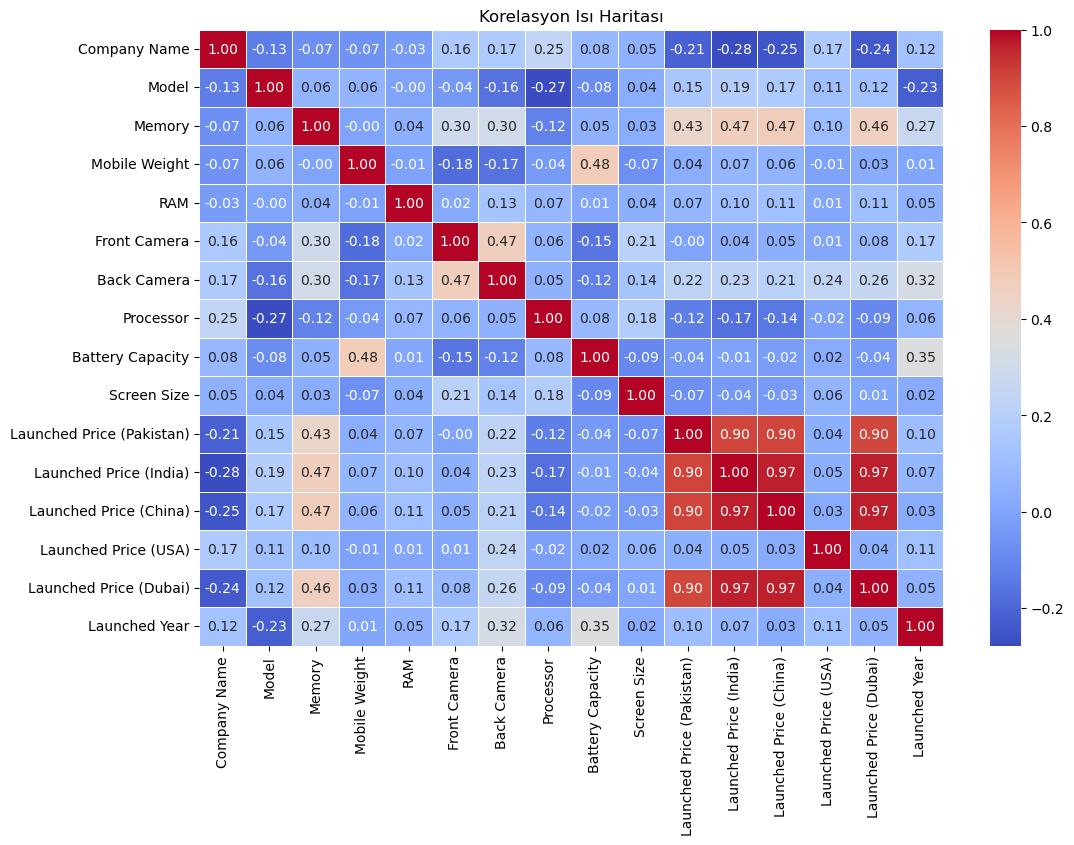

In [13]:
correlation_matrix = dataFrame.corr()
plt.figure(figsize=(12, 8))
sbn.heatmap(correlation_matrix, annot=True, cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title('Korelasyon Isı Haritası')
plt.show()

In [14]:
dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
Company Name,930.0,8.124731,5.354548,0.0,3.0,9.0,13.0,18.0
Model,930.0,342.694624,202.615867,0.0,161.25,340.5,528.75,663.0
Memory,930.0,206.113978,116.879152,16.0,128.0,206.0,256.0,512.0
Mobile Weight,930.0,240.125806,196.947017,135.0,185.0,194.5,208.75,3005.0
RAM,930.0,9.543011,37.408903,1.0,6.0,8.0,8.0,812.0
Front Camera,930.0,18.345161,12.121124,2.0,8.0,16.0,32.0,68.0
Back Camera,930.0,55.517204,36.813559,5.0,25.0,50.0,64.0,212.0
Processor,930.0,105.889247,67.275326,0.0,49.0,98.5,175.0,216.0
Battery Capacity,930.0,5026.163441,1355.548264,2000.0,4402.5,5000.0,5091.25,11200.0
Screen Size,930.0,342.819355,516.439764,8.0,66.0,77.0,658.0,6940.0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# X ve y oluşturuluyor
x = dataFrame.drop(columns=['Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)'])
y = dataFrame[['Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']]
y = np.log1p(y)

# Eğitim/test bölünmesi
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

# Normalize etme
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Null verileri temizleme
mask = y_train.notnull().all(axis=1)
x_train = x_train[mask]
y_train = y_train[mask]

# Kullanılacak modeller
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=15)
}

# Değerlendirme fonksiyonu
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Modelleri döngüyle eğitme ve değerlendirme
model_list = []
r2_list = []

# Gerçek değerleri log'dan çıkar
y_test_real = np.expm1(y_test)

for name, base_model in models.items():
    model = MultiOutputRegressor(base_model)
    model.fit(x_train, y_train)

    # Tahminler
    y_train_pred = np.expm1(model.predict(x_train))
    y_test_pred = np.expm1(model.predict(x_test))

    # Değerlendirme
    train_mae, train_rmse, train_r2 = evaluate_model(np.expm1(y_train), y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test_real, y_test_pred)

    print(f"Model: {name}")
    print("Model performance for Training set")
    print("- RMSE: {:.4f}".format(train_rmse))
    print("- MAE : {:.4f}".format(train_mae))
    print("- R²  : {:.4f}".format(train_r2))

    print("Model performance for Test set")
    print("- RMSE: {:.4f}".format(test_rmse))
    print("- MAE : {:.4f}".format(test_mae))
    print("- R²  : {:.4f}".format(test_r2))

    model_list.append(name)
    r2_list.append(test_r2)
    print("=" * 40)


Model: Linear Regression
Model performance for Training set
- RMSE: 44814.8596
- MAE : 17486.7880
- R²  : 0.1783
Model performance for Test set
- RMSE: 39553.1975
- MAE : 15644.5374
- R²  : 0.2261
Model: Lasso
Model performance for Training set
- RMSE: 52310.1509
- MAE : 21810.6935
- R²  : -0.0798
Model performance for Test set
- RMSE: 46818.8925
- MAE : 19814.4541
- R²  : -0.0573
Model: Ridge
Model performance for Training set
- RMSE: 44745.1596
- MAE : 17403.6276
- R²  : 0.1817
Model performance for Test set
- RMSE: 39570.2370
- MAE : 15637.9712
- R²  : 0.2267
Model: K-Neighbors Regressor
Model performance for Training set
- RMSE: 22465.4249
- MAE : 7903.2164
- R²  : 0.6626
Model performance for Test set
- RMSE: 24643.2115
- MAE : 9155.2860
- R²  : 0.5866
Model: Decision Tree
Model performance for Training set
- RMSE: 0.0000
- MAE : 0.0000
- R²  : 1.0000
Model performance for Test set
- RMSE: 21336.9443
- MAE : 6840.4301
- R²  : 0.8096
Model: Random Forest Regressor
Model performance

In [18]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
9,Gradient Boosting Regressor,0.937843
6,XGBRegressor,0.933768
7,CatBoost Regressor,0.929587
5,Random Forest Regressor,0.886812
4,Decision Tree,0.809599
8,AdaBoost Regressor,0.758252
3,K-Neighbors Regressor,0.586638
2,Ridge,0.226732
0,Linear Regression,0.226098
1,Lasso,-0.057295


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import numpy as np

# --- Hiperparametre grid'i ---
gb_params = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [3, 5, 7],
    'estimator__learning_rate': [0.01, 0.05, 0.1]
}

# --- MultiOutput wrapper ---
gb_model = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))

# --- Grid Search ---
gb_grid = GridSearchCV(gb_model, gb_params, cv=3, n_jobs=-1, scoring='r2', verbose=1)
gb_grid.fit(x_train, y_train)

# --- En iyi model ve parametreleri yazdır ---
print("Best GBoost Parameters:", gb_grid.best_params_)
print("Best CV R² Score:", gb_grid.best_score_)

# --- Test seti değerlendirme ---
best_model = gb_grid.best_estimator_

y_pred = np.expm1(best_model.predict(x_test))  # log1p dönüşümünün tersini al
y_true = np.expm1(y_test)

test_r2 = r2_score(y_true, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
test_mae = mean_absolute_error(y_true, y_pred)

print("\n📊 Test Set Performance")
print(f"R² Score:  {test_r2:.4f}")
print(f"RMSE     : {test_rmse:.2f}")
print(f"MAE      : {test_mae:.2f}")

# --- Modeli kaydet ---
joblib.dump(best_model, 'best_gradient_boosting_model.pkl')
print("\n✅ Model 'best_gradient_boosting_model.pkl' olarak kaydedildi.")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best GBoost Parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 3, 'estimator__n_estimators': 300}
Best CV R² Score: 0.8947825578327177

📊 Test Set Performance
R² Score:  0.8997
RMSE     : 11035.33
MAE      : 4406.04

✅ Model 'best_gradient_boosting_model.pkl' olarak kaydedildi.


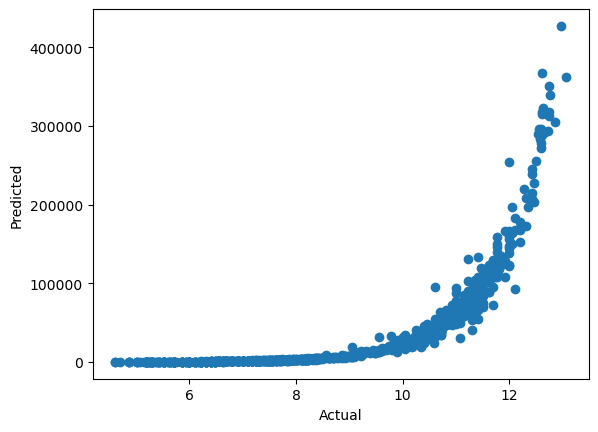

In [23]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

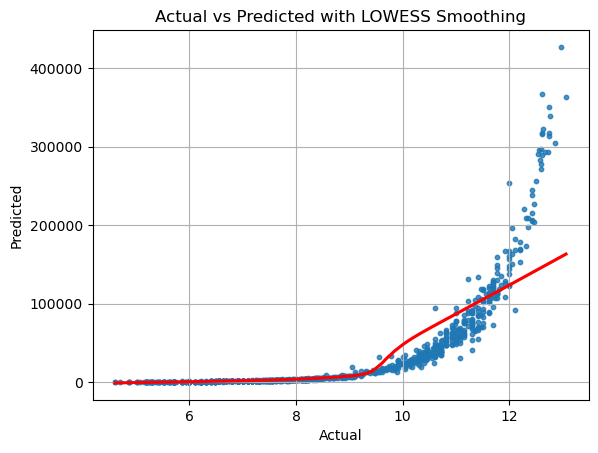

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# y_test ve y_pred 1D numpy dizisine çevrilir
actual = np.ravel(y_test)
predicted = np.ravel(y_pred)

# LOWESS ile scatter + tahmin eğrisi
sns.regplot(x=actual, y=predicted, lowess=True, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted with LOWESS Smoothing")
plt.grid(True)
plt.show()
